**Table of contents**<a id='toc0_'></a>    
- 1. [Imports](#toc1_)    
- 2. [Model class](#toc2_)    
  - 2.1. [Basic Edgeworth box](#toc2_1_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[Imports](#toc0_)

In [39]:
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})


%load_ext autoreload
%autoreload 2

import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 2. <a id='toc2_'></a>[Model class](#toc0_)

In [40]:
from ExchangeEconomy import ExchangeEconomyClass

### 2.1. <a id='toc2_1_'></a>[Basic Edgeworth box](#toc0_)

# Question 1

In [41]:
model = ExchangeEconomyClass()

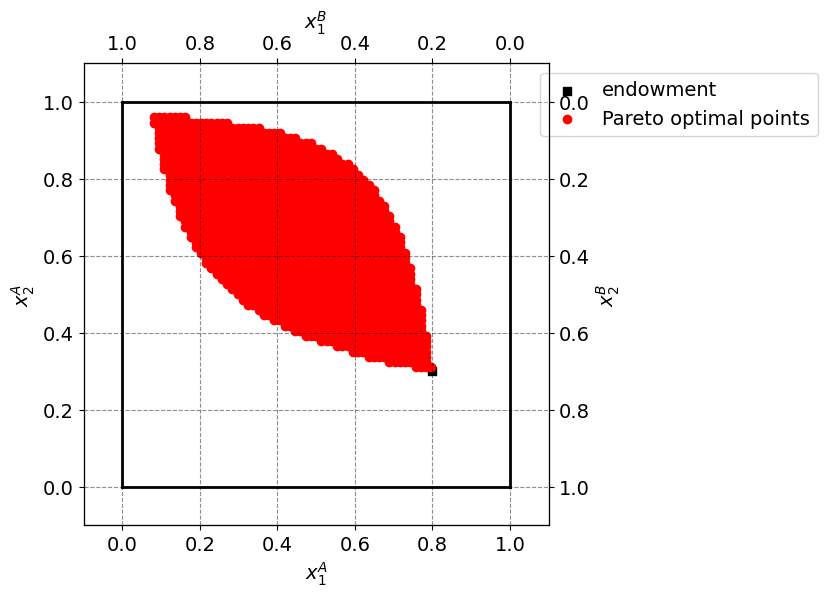

[(0.08108108108108109, 0.945945945945946), (0.08108108108108109, 0.9594594594594595), (0.0945945945945946, 0.8783783783783784), (0.0945945945945946, 0.8918918918918919), (0.0945945945945946, 0.9054054054054055), (0.0945945945945946, 0.918918918918919), (0.0945945945945946, 0.9324324324324325), (0.0945945945945946, 0.945945945945946), (0.0945945945945946, 0.9594594594594595), (0.10810810810810811, 0.8243243243243243), (0.10810810810810811, 0.8378378378378379), (0.10810810810810811, 0.8513513513513514), (0.10810810810810811, 0.8648648648648649), (0.10810810810810811, 0.8783783783783784), (0.10810810810810811, 0.8918918918918919), (0.10810810810810811, 0.9054054054054055), (0.10810810810810811, 0.918918918918919), (0.10810810810810811, 0.9324324324324325), (0.10810810810810811, 0.945945945945946), (0.10810810810810811, 0.9594594594594595), (0.12162162162162163, 0.7702702702702703), (0.12162162162162163, 0.7837837837837838), (0.12162162162162163, 0.7972972972972974), (0.12162162162162163, 

In [42]:
par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0))




#Defining the size of goods

N = 75



#creatring an empty list to store pareto optimal points
pareto_optimal_points = []
x1A_values = []
x2A_values = []

#starting utility function
utiility_A_start = model.utility_A(par.w1A, par.w2A)
utiility_B_start = model.utility_B( 1-par.w1A, 1-par.w2A)


# Iterate over the possible values of xA1 and xA2
for x1A in np.linspace(0, 1, N):
    for x2A in np.linspace(0, 1, N):
        # Calculate the utility of agent A and agent B for the current combination
        uA = model.utility_A( x1A, x2A)
        uB = model.utility_B( 1 - x1A, 1 - x2A)
        
        # Check if the current combination is a Pareto improvement relative to the endowment
        if uA is not None and uB is not None and uA >= utiility_A_start and uB >= utiility_B_start:
            pareto_optimal_points.append((x1A, x2A))
            x1A_values.append(x1A)
            x2A_values.append(x2A)


# Plot the valid combinations in the Edgeworth box
ax_A.scatter(x1A_values, x2A_values, marker='o', color='red', label='Pareto optimal points')
ax_A.legend(frameon=True, loc='upper right', bbox_to_anchor=(1.6, 1.0))

# Update the plot
plt.show()

print(pareto_optimal_points)


# Question 2

In [43]:
# Defining x1A and x2A


# Creating the price vector
P = []

for x1A in np.linspace(0, 1, N):
    p = 0.5 + 2 * x1A
    P.append(p)
    
print(P)

#Calculating the marekt errors
for p in P:
    market_error = model.check_market_clearing(p)
    print("The market error is:", market_error)




[0.5, 0.527027027027027, 0.5540540540540541, 0.5810810810810811, 0.6081081081081081, 0.6351351351351351, 0.6621621621621622, 0.6891891891891893, 0.7162162162162162, 0.7432432432432432, 0.7702702702702703, 0.7972972972972974, 0.8243243243243243, 0.8513513513513513, 0.8783783783783784, 0.9054054054054055, 0.9324324324324325, 0.9594594594594594, 0.9864864864864865, 1.0135135135135136, 1.0405405405405406, 1.0675675675675675, 1.0945945945945947, 1.1216216216216217, 1.1486486486486487, 1.1756756756756757, 1.2027027027027026, 1.2297297297297298, 1.2567567567567568, 1.2837837837837838, 1.310810810810811, 1.337837837837838, 1.364864864864865, 1.3918918918918919, 1.4189189189189189, 1.445945945945946, 1.472972972972973, 1.5, 1.5270270270270272, 1.5540540540540542, 1.5810810810810811, 1.6081081081081081, 1.635135135135135, 1.6621621621621623, 1.6891891891891893, 1.7162162162162162, 1.7432432432432434, 1.7702702702702704, 1.7972972972972974, 1.8243243243243243, 1.8513513513513513, 1.87837837837837

# Question 3

In [57]:
market_clearing_price = None
min_error = float('inf')  # Initialize with a very large value

# Calculate market errors for each price in the price vector
for p in P:
    market_error_1, market_error_2 = model.check_market_clearing(p)
    
    # Calculate the absolute sum of errors
    total_error = abs(market_error_1) + abs(market_error_2)
    
    # Checking if the total error is smaller than the minimum error found so far
    if total_error < min_error:
        min_error = total_error # Update the minimum error leding to finding the smalles absolute error
        market_clearing_price = p
print("The market clearing price is:", market_clearing_price)

The market clearing price is: 0.5


# Question 4a

The maximaization is based on the price vector P of the previous exercise.